In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from itertools import combinations
pd.set_option('display.max_colwidth', None)

In [2]:
def load(f):
    dataset = pd.read_excel(f)
    return dataset
dataset = load("Dataset3.xlsx")

dataset_original = dataset.copy()
dataset_width = dataset.copy()
dataset

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  295 non-null    float64
 1   Humidity     295 non-null    float64
 2   Rainfall     295 non-null    float64
 3   Soil         295 non-null    object 
 4   Crop         295 non-null    object 
 5   Fertilizer   295 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.0+ KB
None


Our labels

In [4]:
temperature_labels = ['Low Temperature', 'Medium Temperature', 'High Temperature']
humidity_labels = ['Low Humidity', 'Moderate Humidity', 'High Humidity']
rainfall_labels = ['Low Rainfall', 'Moderate Rainfall', 'High Rainfall']

# Equal Frequency

In [5]:
import math
import pandas as pd


def categorize_freq(dataset, labels):
    categories = []
    dataset_sorted = dataset.sort_values()
    dataset_length = len(dataset_sorted)

    for i in range(len(labels)):
        min_val_index = int(dataset_length * i / len(labels))
        max_val_index = int(dataset_length * (i + 1) / len(labels))
        interval = dataset_sorted[min_val_index:max_val_index]
        categories.append((interval, labels[i]))

    return categories

def discretise_freq(dataset, attr, labels):
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]
    
    # categorize
    categories = categorize_freq(x, labels)
    # print(categories)

    # replace values with labels
    for i, (category, label) in enumerate(categories):
        categories[i] = pd.Series([label] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)
    dataset[attr] = new_dataset

    return dataset

dataset_freq = discretise_freq(dataset.copy(), 'Temperature', temperature_labels)
dataset_freq = discretise_freq(dataset_freq.copy(), 'Humidity', humidity_labels)
dataset_freq = discretise_freq(dataset_freq.copy(), 'Rainfall', rainfall_labels)

In [6]:
dataset_freq

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,Medium Temperature,Low Humidity,High Rainfall,Clayey,rice,DAP
1,High Temperature,High Humidity,Low Rainfall,laterite,Coconut,Good NPK
2,Low Temperature,Low Humidity,High Rainfall,silty clay,rice,MOP
3,Medium Temperature,High Humidity,Moderate Rainfall,sandy,Coconut,Urea
4,Medium Temperature,High Humidity,Low Rainfall,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,Medium Temperature,High Humidity,Low Rainfall,sandy,Coconut,MOP
291,Medium Temperature,Moderate Humidity,Moderate Rainfall,silty clay,rice,MOP
292,Low Temperature,Moderate Humidity,High Rainfall,Clayey,rice,MOP
293,Medium Temperature,Moderate Humidity,Moderate Rainfall,Clayey,rice,MOP


# Equal Width

In [7]:
import math
import pandas as pd

def calculate_range_width(dataset, k):
    min_val = dataset.quantile(0)
    max_val = dataset.quantile(1)
    range_width = (max_val - min_val) / k
    return range_width

def categorize_width(dataset, range_width, labels):
    categories = []
    min_val = dataset.min()

    for i, label in enumerate(labels):
        max_val = min_val + range_width
        if i == len(labels) - 1:  # for the last category, include the maximum value in the range
            interval = dataset[(dataset >= min_val) & (dataset <= max_val)]
        else:
            interval = dataset[(dataset >= min_val) & (dataset < max_val)]

        categories.append((interval, label))
        min_val = max_val

    return categories

def discretise_width(dataset, attr, labels):
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]


    # calculate the width of the range
    range_width = calculate_range_width(x, len(labels))

    # categorize
    categories = categorize_width(x, range_width, labels)

    # replace values with labels
    for i, (category, label) in enumerate(categories):
        categories[i] = pd.Series([label] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)

    dataset[attr] = new_dataset

    return dataset

dataset_width = discretise_width(dataset_width.copy(), 'Temperature', temperature_labels)
dataset_width = discretise_width(dataset_width.copy(), 'Humidity', humidity_labels)
dataset_width = discretise_width(dataset_width.copy(), 'Rainfall', rainfall_labels)


In [8]:
dataset_width


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,Medium Temperature,Low Humidity,High Rainfall,Clayey,rice,DAP
1,High Temperature,High Humidity,Low Rainfall,laterite,Coconut,Good NPK
2,Low Temperature,Low Humidity,High Rainfall,silty clay,rice,MOP
3,Medium Temperature,High Humidity,Moderate Rainfall,sandy,Coconut,Urea
4,Medium Temperature,High Humidity,Low Rainfall,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,Medium Temperature,High Humidity,Low Rainfall,sandy,Coconut,MOP
291,Medium Temperature,Low Humidity,Moderate Rainfall,silty clay,rice,MOP
292,Medium Temperature,Low Humidity,Moderate Rainfall,Clayey,rice,MOP
293,Medium Temperature,Low Humidity,Moderate Rainfall,Clayey,rice,MOP


# Apriori algorithm for our Dataset

In [9]:
def organise(dataset):
    dataset['TH'] = pd.concat([dataset['Temperature'].astype(str), dataset['Humidity']], axis=1).agg(' '.join, axis=1)
    dataset['THR'] = pd.concat([dataset['TH'].astype(str), dataset['Rainfall']], axis=1).agg(' '.join, axis=1)
    dataset['Conditions'] = pd.concat([dataset['THR'].astype(str), dataset['Soil']], axis=1).agg(' '.join, axis=1)

    dataset['Item'] = pd.concat([dataset['Crop'].astype(str), dataset['Fertilizer']], axis=1).agg(' '.join, axis=1)
    dataset['THR'] = pd.concat([dataset['TH'].astype(str), dataset['Rainfall']], axis=1).agg(' '.join, axis=1)
    dataset

    return dataset
dataset_test = dataset_freq.copy() # for presenting code
dataset_test = organise(dataset_test)
dataset_test

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,TH,THR,Conditions,Item
0,Medium Temperature,Low Humidity,High Rainfall,Clayey,rice,DAP,Medium Temperature Low Humidity,Medium Temperature Low Humidity High Rainfall,Medium Temperature Low Humidity High Rainfall Clayey,rice DAP
1,High Temperature,High Humidity,Low Rainfall,laterite,Coconut,Good NPK,High Temperature High Humidity,High Temperature High Humidity Low Rainfall,High Temperature High Humidity Low Rainfall laterite,Coconut Good NPK
2,Low Temperature,Low Humidity,High Rainfall,silty clay,rice,MOP,Low Temperature Low Humidity,Low Temperature Low Humidity High Rainfall,Low Temperature Low Humidity High Rainfall silty clay,rice MOP
3,Medium Temperature,High Humidity,Moderate Rainfall,sandy,Coconut,Urea,Medium Temperature High Humidity,Medium Temperature High Humidity Moderate Rainfall,Medium Temperature High Humidity Moderate Rainfall sandy,Coconut Urea
4,Medium Temperature,High Humidity,Low Rainfall,coastal,Coconut,Urea,Medium Temperature High Humidity,Medium Temperature High Humidity Low Rainfall,Medium Temperature High Humidity Low Rainfall coastal,Coconut Urea
...,...,...,...,...,...,...,...,...,...,...
290,Medium Temperature,High Humidity,Low Rainfall,sandy,Coconut,MOP,Medium Temperature High Humidity,Medium Temperature High Humidity Low Rainfall,Medium Temperature High Humidity Low Rainfall sandy,Coconut MOP
291,Medium Temperature,Moderate Humidity,Moderate Rainfall,silty clay,rice,MOP,Medium Temperature Moderate Humidity,Medium Temperature Moderate Humidity Moderate Rainfall,Medium Temperature Moderate Humidity Moderate Rainfall silty clay,rice MOP
292,Low Temperature,Moderate Humidity,High Rainfall,Clayey,rice,MOP,Low Temperature Moderate Humidity,Low Temperature Moderate Humidity High Rainfall,Low Temperature Moderate Humidity High Rainfall Clayey,rice MOP
293,Medium Temperature,Moderate Humidity,Moderate Rainfall,Clayey,rice,MOP,Medium Temperature Moderate Humidity,Medium Temperature Moderate Humidity Moderate Rainfall,Medium Temperature Moderate Humidity Moderate Rainfall Clayey,rice MOP


In [10]:
def create_transactions(dataset):
    # Group by 'Watcher' and aggregate the 'videoCategoryLabel' values into lists
    agriculture_df = dataset.groupby('Conditions')['Item'].apply(list).reset_index()
    agriculture_df['Item'] = agriculture_df['Item'].apply(lambda x: list(set(x)))

    # Rename columns for clarity
    agriculture_df.columns = ['Conditions', 'Items']

    # Display the modified DataFrame
    agriculture_df
    return agriculture_df
agriculture_df_test = create_transactions(dataset_test) # for presenting code
agriculture_df_test

,Conditions,Items
0,High Temperature High Humidity High Rainfall alluvial,"[Coconut MOP, Coconut DAP]"
1,High Temperature High Humidity High Rainfall laterite,"[Coconut Urea, Coconut MOP]"
2,High Temperature High Humidity High Rainfall sandy,[Coconut Urea]
3,High Temperature High Humidity Low Rainfall alluvial,"[Coconut Urea, Coconut MOP, Coconut DAP]"
4,High Temperature High Humidity Low Rainfall coastal,"[Coconut Urea, Coconut MOP, Coconut DAP]"
...,...,...
70,Medium Temperature Moderate Humidity Low Rainfall sandy,"[Coconut Urea, Coconut MOP, Coconut DAP]"
71,Medium Temperature Moderate Humidity Moderate Rainfall Clayey,"[rice Urea, rice Good NPK, rice MOP]"
72,Medium Temperature Moderate Humidity Moderate Rainfall clay loam,"[rice Urea, rice Good NPK, rice MOP]"
73,Medium Temperature Moderate Humidity Moderate Rainfall coastal,"[Coconut Urea, Coconut DAP]"


In [11]:

def apriori(agriculture_df, min_support):# Function to generate k-itemsets candidates (Ck)
    def generate_L1(data, k):
        candidates = []
        for itemset in data:
            for candidate in combinations(itemset, k):
                candidates.append(tuple(sorted(candidate)))
        candidates=set(candidates)
        itemset_counts = calculate_support(data, candidates, min_support)    
        frequent_itemsets = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support}
        return frequent_itemsets
    
    def generate_candidates_k(data, k, frequent_itemsets_prev):
        candidates = []
        
        # Generate candidate pairs from frequent_itemsets_prev
        candidate_pairs = list(combinations(frequent_itemsets_prev, 2))
        
        for itemset in data:
            # Generate candidate sets by union of items in each pair
            for pair in candidate_pairs:
                candidate_set = set(pair[0]).union(set(pair[1]))
                
                # Check if the candidate set meets the size and subset conditions
                if len(candidate_set) == k and all(subset in frequent_itemsets_prev for subset in combinations(candidate_set, k-1)):
                    candidates.append(tuple(sorted(candidate_set)))
        
        return set(candidates)

    def calculate_support(data, candidates, min_support):
        itemset_counts = {}
        num_itemsets = len(data)
        
        for candidate in candidates:
            for itemset in data:
                if set(candidate).issubset(set(itemset)):
                    itemset_counts[candidate] = itemset_counts.get(candidate, 0) + 1
        
        return itemset_counts

    # Function to generate frequent k-itemsets (Lk)
    def generate_frequent_itemsets_k(data, k, min_support, frequent_itemsets_prev):
        candidates = generate_candidates_k(data, k, frequent_itemsets_prev)
        
        itemset_counts = calculate_support(data, candidates, min_support)
        frequent_itemsets = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support}
        
        return frequent_itemsets

    # Sample data (use your transformed dataset)
    data = agriculture_df['Items']
    all_frequent_itemsets = []

    # Initialize L1 with frequent items
    frequent_itemsets_prev = generate_L1(data, 1)

    print('Frequent 1-itemsets:')
    for itemset, support in frequent_itemsets_prev.items():
        print(f'{itemset}: Support = {support:.2f}')
        all_frequent_itemsets.append((itemset, support))
    print('\n\n')

    # Apply Apriori algorithm to find frequent itemsets of different sizes (k)
    k = 2
    while True:
        frequent_itemsets = generate_frequent_itemsets_k(data, k, min_support, frequent_itemsets_prev)
        
        if not frequent_itemsets:  # Stop when frequent_itemsets is empty
            break
        
        frequent_itemsets_prev = frequent_itemsets  # Update the frequent itemsets for the next iteration
        
        print(f'Frequent {k}-itemsets:')
        for itemset, support in frequent_itemsets.items():
            print(f'{itemset}: Support = {support:.2f}')
            all_frequent_itemsets.append((itemset, support))
        
        print('\n\n')
        
        k += 1

    print('\nall_frequent_itemsets:')

    print(all_frequent_itemsets)
    return all_frequent_itemsets


In [12]:
def run_apriori(dataset, min_support):
    dataset = organise(dataset)
    agriculture_df = create_transactions(dataset)
    number_of_transactions = len(agriculture_df['Conditions'])
    print('NUM TRANS = ', number_of_transactions)
    min_supp = min_support * number_of_transactions
    print('MIN SUPP = ', min_supp)
    all_frequent_itemsets = apriori(agriculture_df, min_supp)
    return all_frequent_itemsets, agriculture_df

In [13]:
all_frequent_itemsets_test, agriculture_df_test = run_apriori(dataset_test, 0.1)

NUM TRANS =  75
MIN SUPP =  7.5
Frequent 1-itemsets:
('rice Good NPK',): Support = 9.00
('Coconut DAP',): Support = 26.00
('rice DAP',): Support = 20.00
('rice MOP',): Support = 23.00
('Coconut Urea',): Support = 33.00
('rice Urea',): Support = 21.00
('Coconut Good NPK',): Support = 13.00
('Coconut MOP',): Support = 23.00



Frequent 2-itemsets:
('Coconut DAP', 'Coconut Urea'): Support = 22.00
('rice DAP', 'rice Urea'): Support = 10.00
('Coconut Good NPK', 'Coconut MOP'): Support = 8.00
('rice DAP', 'rice MOP'): Support = 16.00
('rice MOP', 'rice Urea'): Support = 15.00
('Coconut MOP', 'Coconut Urea'): Support = 17.00
('Coconut DAP', 'Coconut MOP'): Support = 12.00
('Coconut DAP', 'Coconut Good NPK'): Support = 9.00
('Coconut Good NPK', 'Coconut Urea'): Support = 10.00




all_frequent_itemsets:
[(('rice Good NPK',), 9), (('Coconut DAP',), 26), (('rice DAP',), 20), (('rice MOP',), 23), (('Coconut Urea',), 33), (('rice Urea',), 21), (('Coconut Good NPK',), 13), (('Coconut MOP',), 23), (

In [14]:
# number of fertilizers
def fertilizer_count(dataset, attr = 'Fertilizer'):
    return dataset[attr].nunique()
count = fertilizer_count(dataset)
print(count)

4


# Association rules

In [15]:
from itertools import chain, combinations

def generate_association_rules(frequent_itemsets):
    association_rules = set()

    for itemset, _ in frequent_itemsets:
        if len(itemset) > 1:
            itemset = frozenset(itemset)

            for antecedent_size in range(1, len(itemset)):
                for antecedent in combinations(itemset, antecedent_size):
                    antecedent = frozenset(antecedent)
                    consequent = itemset - antecedent

                    # Check if the rule already exists or its reverse exists
                    if (antecedent, consequent) not in association_rules :
                        association_rules.add((antecedent, consequent))

    return association_rules



In [16]:
# Example usage
frequent_itemsets = all_frequent_itemsets_test

association_rules = generate_association_rules(frequent_itemsets)

In [17]:
def calculate_confidence(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    # print('ant',antecedent_tuple)
    consequent_tuple = tuple(sorted(consequent))
    # print('cons',consequent_tuple)

    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    # print('combined',combined_itemset)
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    # print('antecedent_support',antecedent_support)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)
    # print('combined support',combined_support)
    confidence = combined_support / antecedent_support if antecedent_support != 0 else 0
    return confidence

In [18]:

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_confidence(rule, all_frequent_itemsets_test)
    print(f"Rule: {rule}, Confidence: {confidence}")

Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut MOP'})), Confidence: 0.46153846153846156
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.34615384615384615
Rule: (frozenset({'rice Urea'}), frozenset({'rice DAP'})), Confidence: 0.47619047619047616
Rule: (frozenset({'Coconut Good NPK'}), frozenset({'Coconut DAP'})), Confidence: 0.6923076923076923
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut MOP'})), Confidence: 0.5151515151515151
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Urea'})), Confidence: 0.8461538461538461
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.34782608695652173
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut DAP'})), Confidence: 0.5217391304347826
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut Good NPK'})), Confidence: 0.30303030303030304
Rule: (frozenset({'rice DAP'}), frozenset({'rice Urea'})), Confidence: 0.5
Rule: (frozenset({'rice Urea'}), frozenset({'ri

In [19]:
def calculate_all_confidence(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    max_support = max(antecedent_support, consequent_support)

    all_confidence = combined_support / max_support if max_support != 0 else 0
    return all_confidence

In [20]:

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_all_confidence(rule, all_frequent_itemsets_test)
    print(f"Rule: {rule}, Confidence: {confidence}")

Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut MOP'})), Confidence: 0.46153846153846156
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.34615384615384615
Rule: (frozenset({'rice Urea'}), frozenset({'rice DAP'})), Confidence: 0.47619047619047616
Rule: (frozenset({'Coconut Good NPK'}), frozenset({'Coconut DAP'})), Confidence: 0.34615384615384615
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut MOP'})), Confidence: 0.5151515151515151
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Urea'})), Confidence: 0.6666666666666666
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.34782608695652173
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut DAP'})), Confidence: 0.46153846153846156
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut Good NPK'})), Confidence: 0.30303030303030304
Rule: (frozenset({'rice DAP'}), frozenset({'rice Urea'})), Confidence: 0.47619047619047616
Rule: (frozenset({'rice Urea'

In [21]:
def calculate_max_confidence(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    max_confidence = max(combined_support/antecedent_support ,combined_support /  consequent_support)
    # Ensure the value is between 0 and 1
    #max_confidence = min(max_confidence, 1.0)

    return max_confidence

In [22]:

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_max_confidence(rule, all_frequent_itemsets_test)
    print(f"Rule: {rule}, Confidence: {confidence}")

Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut MOP'})), Confidence: 0.5217391304347826
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.6923076923076923
Rule: (frozenset({'rice Urea'}), frozenset({'rice DAP'})), Confidence: 0.5
Rule: (frozenset({'Coconut Good NPK'}), frozenset({'Coconut DAP'})), Confidence: 0.6923076923076923
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut MOP'})), Confidence: 0.7391304347826086
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Urea'})), Confidence: 0.8461538461538461
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.6153846153846154
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut DAP'})), Confidence: 0.5217391304347826
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut Good NPK'})), Confidence: 0.7692307692307693
Rule: (frozenset({'rice DAP'}), frozenset({'rice Urea'})), Confidence: 0.5
Rule: (frozenset({'rice Urea'}), frozenset({'rice MOP'})), Confiden

In [23]:
from math import sqrt

def calculate_cosine_similarity(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    cosine_similarity = combined_support/ sqrt(antecedent_support * consequent_support) if antecedent_support != 0 and consequent_support != 0 else 0
    return cosine_similarity

In [24]:

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_cosine_similarity(rule, all_frequent_itemsets_test)
    print(f"Rule: {rule}, Confidence: {confidence}")

Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut MOP'})), Confidence: 0.49071649206571843
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.4895354638983791
Rule: (frozenset({'rice Urea'}), frozenset({'rice DAP'})), Confidence: 0.4879500364742666
Rule: (frozenset({'Coconut Good NPK'}), frozenset({'Coconut DAP'})), Confidence: 0.4895354638983791
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut MOP'})), Confidence: 0.6170609073445336
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Urea'})), Confidence: 0.7510676161988108
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.46265194557299216
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut DAP'})), Confidence: 0.49071649206571843
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut Good NPK'})), Confidence: 0.4828045495852676
Rule: (frozenset({'rice DAP'}), frozenset({'rice Urea'})), Confidence: 0.4879500364742666
Rule: (frozenset({'rice Urea'}), f

In [25]:
def calculate_jaccard_similarity(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    jaccard_similarity = combined_support / (antecedent_support+consequent_support-combined_support) 

    return jaccard_similarity

In [26]:

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_jaccard_similarity(rule, all_frequent_itemsets_test)
    print(f"Rule: {rule}, Confidence: {confidence}")

Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut MOP'})), Confidence: 0.32432432432432434
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.3
Rule: (frozenset({'rice Urea'}), frozenset({'rice DAP'})), Confidence: 0.3225806451612903
Rule: (frozenset({'Coconut Good NPK'}), frozenset({'Coconut DAP'})), Confidence: 0.3
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut MOP'})), Confidence: 0.4358974358974359
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Urea'})), Confidence: 0.5945945945945946
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.2857142857142857
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut DAP'})), Confidence: 0.32432432432432434
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut Good NPK'})), Confidence: 0.2777777777777778
Rule: (frozenset({'rice DAP'}), frozenset({'rice Urea'})), Confidence: 0.3225806451612903
Rule: (frozenset({'rice Urea'}), frozenset({'rice MOP'})), Confid

In [27]:
def calculate_kulczynski_similarity_union(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    kulczynski_similarity = 0.5 * (combined_support / antecedent_support + combined_support / consequent_support) if antecedent_support != 0 and consequent_support != 0 else 0
    return kulczynski_similarity


In [28]:

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_kulczynski_similarity_union(rule, all_frequent_itemsets_test)
    print(f"Rule: {rule}, Confidence: {confidence}")

Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut MOP'})), Confidence: 0.4916387959866221
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.5192307692307692
Rule: (frozenset({'rice Urea'}), frozenset({'rice DAP'})), Confidence: 0.4880952380952381
Rule: (frozenset({'Coconut Good NPK'}), frozenset({'Coconut DAP'})), Confidence: 0.5192307692307692
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut MOP'})), Confidence: 0.6271409749670619
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Urea'})), Confidence: 0.7564102564102564
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.4816053511705686
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut DAP'})), Confidence: 0.4916387959866221
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut Good NPK'})), Confidence: 0.5361305361305362
Rule: (frozenset({'rice DAP'}), frozenset({'rice Urea'})), Confidence: 0.4880952380952381
Rule: (frozenset({'rice Urea'}), froz

In [29]:
def calculate_lift(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))

    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)

    confidence = calculate_confidence(rule, all_frequent_itemsets)
    
    lift = confidence / consequent_support if consequent_support != 0 else 0
    return lift


In [30]:
# Example usage
frequent_itemsets = all_frequent_itemsets_test

association_rules = generate_association_rules(frequent_itemsets)

In [31]:

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_lift(rule, all_frequent_itemsets_test)
    print(f"Rule: {rule}, Confidence: {confidence}")

Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut MOP'})), Confidence: 0.020066889632107024
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.026627218934911243
Rule: (frozenset({'rice Urea'}), frozenset({'rice DAP'})), Confidence: 0.023809523809523808
Rule: (frozenset({'Coconut Good NPK'}), frozenset({'Coconut DAP'})), Confidence: 0.026627218934911243
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut MOP'})), Confidence: 0.022397891963109352
Rule: (frozenset({'Coconut DAP'}), frozenset({'Coconut Urea'})), Confidence: 0.02564102564102564
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut Good NPK'})), Confidence: 0.026755852842809364
Rule: (frozenset({'Coconut MOP'}), frozenset({'Coconut DAP'})), Confidence: 0.020066889632107024
Rule: (frozenset({'Coconut Urea'}), frozenset({'Coconut Good NPK'})), Confidence: 0.023310023310023312
Rule: (frozenset({'rice DAP'}), frozenset({'rice Urea'})), Confidence: 0.023809523809523808
Rule: (frozenset({

In [32]:
import re
def fortes_regles_association(mesure_correlation,min_confidence,all_frequent_itemsets, association_rules):

    pattern = re.compile(r'frozenset\((.*?)\)')
    fortes_regles=[]
    for rule in association_rules:
        confidence = mesure_correlation(rule, all_frequent_itemsets)
        if (confidence >= min_confidence) :
            text=(f"Rule: {rule},conf: {confidence}")
            transformed_text = re.sub(pattern, r'\1', text) 
            fortes_regles.append(transformed_text)  
    print('SIZEEEEEEEEEEEEEEEEEEEEEEEE ', len(fortes_regles))
    return fortes_regles

fortes_regles_association(calculate_kulczynski_similarity_union,0.6,all_frequent_itemsets_test, association_rules)

SIZEEEEEEEEEEEEEEEEEEEEEEEE  8


["Rule: ({'Coconut Urea'}, {'Coconut MOP'}),conf: 0.6271409749670619",
 "Rule: ({'Coconut DAP'}, {'Coconut Urea'}),conf: 0.7564102564102564",
 "Rule: ({'rice Urea'}, {'rice MOP'}),conf: 0.6832298136645962",
 "Rule: ({'Coconut MOP'}, {'Coconut Urea'}),conf: 0.6271409749670619",
 "Rule: ({'rice DAP'}, {'rice MOP'}),conf: 0.7478260869565218",
 "Rule: ({'rice MOP'}, {'rice DAP'}),conf: 0.7478260869565218",
 "Rule: ({'rice MOP'}, {'rice Urea'}),conf: 0.6832298136645962",
 "Rule: ({'Coconut Urea'}, {'Coconut DAP'}),conf: 0.7564102564102564"]

# Options avancées de l’IHM

In [33]:
def run_all(dataset, discretize_method, confidence_method, min_support, min_conf):
    
    dataset = discretize_method(dataset.copy(), 'Temperature', temperature_labels)
    dataset = discretize_method(dataset.copy(), 'Humidity', humidity_labels)
    dataset = discretize_method(dataset.copy(), 'Rainfall', rainfall_labels)
    
    all_frequent_itemsets, agriculture_df = run_apriori(dataset, min_support)
    print('\n\n')
    association_rules = generate_association_rules(all_frequent_itemsets)
    
    import re
    pattern = re.compile(r'frozenset\((.*?)\)')
    # Print the generated association rules
    # for rule in association_rules:
    #     confidence = confidence_method(rule, all_frequent_itemsets)
    #     text=(f"Rule: {rule}, Confidence: {confidence}")
    #     transformed_text = re.sub(pattern, r'\1', text)
    #     print(transformed_text)
    # print('\n\n')
    fortes_regles = fortes_regles_association(confidence_method,min_conf,all_frequent_itemsets, association_rules)
    for regle in fortes_regles:
        print('{', regle, '}')
    return agriculture_df, fortes_regles,association_rules

run_all(dataset_original, discretise_width, calculate_kulczynski_similarity_union, 0.1, 0.6)   
    

NUM TRANS =  61
MIN SUPP =  6.1000000000000005
Frequent 1-itemsets:
('rice Good NPK',): Support = 9.00
('Coconut DAP',): Support = 26.00
('rice DAP',): Support = 17.00
('rice MOP',): Support = 13.00
('Coconut Urea',): Support = 31.00
('rice Urea',): Support = 17.00
('Coconut Good NPK',): Support = 13.00
('Coconut MOP',): Support = 22.00



Frequent 2-itemsets:
('Coconut DAP', 'Coconut Urea'): Support = 22.00
('rice Good NPK', 'rice Urea'): Support = 7.00
('rice DAP', 'rice Urea'): Support = 11.00
('Coconut Good NPK', 'Coconut MOP'): Support = 7.00
('rice DAP', 'rice MOP'): Support = 11.00
('rice MOP', 'rice Urea'): Support = 11.00
('Coconut MOP', 'Coconut Urea'): Support = 20.00
('Coconut DAP', 'Coconut MOP'): Support = 14.00
('Coconut DAP', 'Coconut Good NPK'): Support = 9.00
('Coconut Good NPK', 'Coconut Urea'): Support = 11.00




all_frequent_itemsets:
[(('rice Good NPK',), 9), (('Coconut DAP',), 26), (('rice DAP',), 17), (('rice MOP',), 13), (('Coconut Urea',), 31), (('rice Urea',

(                                                          Conditions  \
 0               High Temperature High Humidity Low Rainfall alluvial   
 1                High Temperature High Humidity Low Rainfall coastal   
 2               High Temperature High Humidity Low Rainfall laterite   
 3                  High Temperature High Humidity Low Rainfall sandy   
 4             High Temperature High Humidity Low Rainfall silty clay   
 ..                                                               ...   
 56         Medium Temperature Moderate Humidity Low Rainfall coastal   
 57        Medium Temperature Moderate Humidity Low Rainfall laterite   
 58           Medium Temperature Moderate Humidity Low Rainfall sandy   
 59  Medium Temperature Moderate Humidity Moderate Rainfall clay loam   
 60    Medium Temperature Moderate Humidity Moderate Rainfall coastal   
 
                                                          Items  
 0                     [Coconut Urea, Coconut MOP, Cocon

In [34]:
dataset_original

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


In [35]:
print(dataset_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  295 non-null    float64
 1   Humidity     295 non-null    float64
 2   Rainfall     295 non-null    float64
 3   Soil         295 non-null    object 
 4   Crop         295 non-null    object 
 5   Fertilizer   295 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.0+ KB
None


In [36]:
def print_unique_values(dataframe, column_name):
    unique_values = dataframe[column_name].unique()
    
    print(f"Unique values in column '{column_name}':")
    for value in unique_values:
        print(value)

# Example usage:
# Assuming 'dataset' is your DataFrame and 'Temperature' is the column name
print_unique_values(dataset_original, 'Soil')
print_unique_values(dataset_original, 'Crop')
print_unique_values(dataset_original, 'Fertilizer')

Unique values in column 'Soil':
Clayey
laterite
silty clay
sandy
coastal
clay loam
alluvial
Unique values in column 'Crop':
rice
Coconut
Unique values in column 'Fertilizer':
DAP
Good NPK
MOP
Urea


In [37]:
def add_random_rows(df, n):
    for _ in range(n):
        new_row = pd.Series({
            'Temperature': np.random.uniform(20.0, 30.0),
            'Humidity': np.random.uniform(90, 100),
            'Rainfall': np.random.uniform(100, 300),
            'Soil': np.random.choice(['Clayey', 'laterite', 'silty clay', 'sandy', 'coastal', 'alluvial','clay loam' ]),
            'Crop': np.random.choice(['Coconut', 'rice']),
            'Fertilizer': np.random.choice(['Good NPK', 'DAP', 'MOP', 'Urea'])
        })

        df = pd.concat([df, new_row.to_frame().transpose()], ignore_index=True)

    return df
new_dataset = add_random_rows(dataset_original, 10)
new_dataset

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.9,sandy,Coconut,Urea
4,25.04,95.9,174.8,coastal,Coconut,Urea
...,...,...,...,...,...,...
300,26.799266,95.245785,254.200304,silty clay,rice,DAP
301,20.913597,99.863877,226.787488,laterite,Coconut,MOP
302,24.742349,96.440058,243.664267,sandy,Coconut,Good NPK
303,22.184055,95.788029,125.895452,alluvial,Coconut,DAP


In [38]:
agriculture_df, fortes_regles ,association_rules= run_all(new_dataset, discretise_width, calculate_kulczynski_similarity_union, 0.3, 0.6) 
agriculture_df




NUM TRANS =  64
MIN SUPP =  19.2
Frequent 1-itemsets:
('Coconut DAP',): Support = 28.00
('Coconut Urea',): Support = 32.00
('Coconut MOP',): Support = 26.00



Frequent 2-itemsets:
('Coconut MOP', 'Coconut Urea'): Support = 22.00
('Coconut DAP', 'Coconut Urea'): Support = 25.00




all_frequent_itemsets:
[(('Coconut DAP',), 28), (('Coconut Urea',), 32), (('Coconut MOP',), 26), (('Coconut MOP', 'Coconut Urea'), 22), (('Coconut DAP', 'Coconut Urea'), 25)]



SIZEEEEEEEEEEEEEEEEEEEEEEEE  4
{ Rule: ({'Coconut DAP'}, {'Coconut Urea'}),conf: 0.8370535714285714 }
{ Rule: ({'Coconut Urea'}, {'Coconut MOP'}),conf: 0.7668269230769231 }
{ Rule: ({'Coconut Urea'}, {'Coconut DAP'}),conf: 0.8370535714285714 }
{ Rule: ({'Coconut MOP'}, {'Coconut Urea'}),conf: 0.7668269230769231 }


,Conditions,Items
0,High Temperature High Humidity High Rainfall silty clay,[rice DAP]
1,High Temperature High Humidity Low Rainfall alluvial,"[Coconut Urea, Coconut MOP, Coconut DAP]"
2,High Temperature High Humidity Low Rainfall coastal,"[Coconut Urea, Coconut MOP, Coconut DAP]"
3,High Temperature High Humidity Low Rainfall laterite,"[Coconut Urea, Coconut MOP, Coconut DAP, Coconut Good NPK]"
4,High Temperature High Humidity Low Rainfall sandy,"[Coconut Urea, Coconut MOP, Coconut DAP, Coconut Good NPK]"
...,...,...
59,Medium Temperature Moderate Humidity Low Rainfall sandy,"[Coconut Urea, Coconut DAP]"
60,Medium Temperature Moderate Humidity Moderate Rainfall Clayey,[Coconut Good NPK]
61,Medium Temperature Moderate Humidity Moderate Rainfall clay loam,[rice Good NPK]
62,Medium Temperature Moderate Humidity Moderate Rainfall coastal,"[Coconut Urea, Coconut DAP]"


In [39]:
dataset_original

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


In [40]:
import numpy as np

start_value = 0.0
end_value = 1.0
step_size = 0.1

min_supp = np.arange(start_value, end_value + step_size, step_size)
print(min_supp)
min_conf = np.arange(start_value, end_value + step_size, step_size)
print(min_conf)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [41]:
supp_list = []
conf_list = []
recc_list = []
for supp in min_supp:
    for conf in min_conf:
            agriculture_all, recommendations,association_rules = run_all(dataset_original.copy(), discretise_width, calculate_kulczynski_similarity_union, supp, conf) 
            supp_list.append(supp)
            conf_list.append(conf)
            recc_list.append(len(recommendations))

NUM TRANS =  61
MIN SUPP =  0.0
Frequent 1-itemsets:
('rice Good NPK',): Support = 9.00
('Coconut DAP',): Support = 26.00
('rice DAP',): Support = 17.00
('rice MOP',): Support = 13.00
('Coconut Urea',): Support = 31.00
('rice Urea',): Support = 17.00
('Coconut Good NPK',): Support = 13.00
('Coconut MOP',): Support = 22.00



Frequent 2-itemsets:
('Coconut DAP', 'Coconut Urea'): Support = 22.00
('rice Good NPK', 'rice Urea'): Support = 7.00
('rice DAP', 'rice Urea'): Support = 11.00
('Coconut Good NPK', 'Coconut MOP'): Support = 7.00
('rice Good NPK', 'rice MOP'): Support = 5.00
('rice DAP', 'rice MOP'): Support = 11.00
('rice MOP', 'rice Urea'): Support = 11.00
('Coconut MOP', 'Coconut Urea'): Support = 20.00
('Coconut DAP', 'Coconut MOP'): Support = 14.00
('Coconut DAP', 'Coconut Good NPK'): Support = 9.00
('Coconut Good NPK', 'Coconut Urea'): Support = 11.00
('rice DAP', 'rice Good NPK'): Support = 4.00




all_frequent_itemsets:
[(('rice Good NPK',), 9), (('Coconut DAP',), 26), (('r

NUM TRANS =  61
MIN SUPP =  18.300000000000004
Frequent 1-itemsets:
('Coconut DAP',): Support = 26.00
('Coconut Urea',): Support = 31.00
('Coconut MOP',): Support = 22.00



Frequent 2-itemsets:
('Coconut MOP', 'Coconut Urea'): Support = 20.00
('Coconut DAP', 'Coconut Urea'): Support = 22.00




all_frequent_itemsets:
[(('Coconut DAP',), 26), (('Coconut Urea',), 31), (('Coconut MOP',), 22), (('Coconut MOP', 'Coconut Urea'), 20), (('Coconut DAP', 'Coconut Urea'), 22)]



SIZEEEEEEEEEEEEEEEEEEEEEEEE  0
NUM TRANS =  61
MIN SUPP =  24.400000000000002
Frequent 1-itemsets:
('Coconut DAP',): Support = 26.00
('Coconut Urea',): Support = 31.00




all_frequent_itemsets:
[(('Coconut DAP',), 26), (('Coconut Urea',), 31)]



SIZEEEEEEEEEEEEEEEEEEEEEEEE  0
NUM TRANS =  61
MIN SUPP =  24.400000000000002
Frequent 1-itemsets:
('Coconut DAP',): Support = 26.00
('Coconut Urea',): Support = 31.00




all_frequent_itemsets:
[(('Coconut DAP',), 26), (('Coconut Urea',), 31)]



SIZEEEEEEEEEEEEEEEEEEEEEEEE  

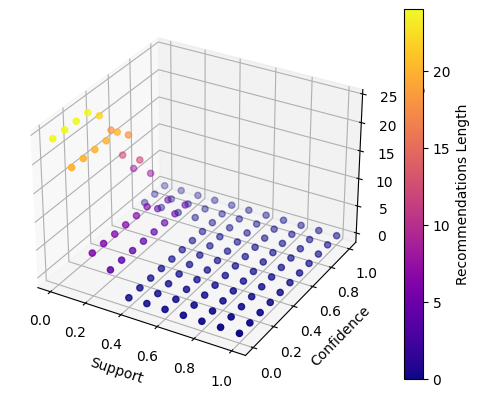

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Assuming you have supp_list, conf_list, and recc_list defined

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with support, confidence, and recommendations length
scatter = ax.scatter(supp_list, conf_list, recc_list, c=recc_list, cmap=cm.plasma)

# Set axis labels
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Recommendations Length')

# Add a colorbar to show the mapping of colors to values
cbar = fig.colorbar(scatter, ax=ax, label='Recommendations Length')

# Show the plot
plt.show()


In [43]:
def add_row_to_dataframe(df, temperature, humidity, rainfall, soil, crop, fertilizer):
    new_row = pd.Series({
        'Temperature': temperature,
        'Humidity': humidity,
        'Rainfall': rainfall,
        'Soil': soil,
        'Crop': crop,
        'Fertilizer': fertilizer
    })
    
    target_antecedent = (crop+' '+fertilizer)

    # Check the type of df and its attributes
    print(f"Type of df: {type(df)}")
    print(f"Columns of df: {df.columns if isinstance(df, pd.DataFrame) else None}")

    # Append the new row
    df = pd.concat([df, new_row.to_frame().transpose()], ignore_index=True)
    agriculture_all, recommendations,association_rules = run_all(dataset_original.copy(), discretise_width, calculate_kulczynski_similarity_union, 0.1, 0.1) 
    

    
    consequents=[]
    # Append the new row
    df = pd.concat([df, new_row.to_frame().transpose()], ignore_index=True)
    agriculture_all, recommendations,association_rules = run_all(df.copy(), discretise_width, calculate_kulczynski_similarity_union, 0.1, 0.1) 
    
    for rule in association_rules:

        antecedent, consequent = rule

        # Check if the rule already exists or its reverse exists
        if target_antecedent in antecedent:
            conf=calculate_confidence(rule, all_frequent_itemsets_test)
            consequents.append((antecedent,consequent,conf))
    
    print('consequents')
    print(consequents)
    # Trier la liste par la confiance (de la plus grande à la plus petite)
    sorted_consequent = sorted(consequents, key=lambda x: x[1], reverse=True)
    print('\nTEST',sorted_consequent)
    top_results = sorted_consequent[:3]
    print('top results',top_results)


    return df


# 

In [44]:
new_dataset = add_row_to_dataframe(
    dataset_original,
    temperature=25.5,
    humidity=60.0,
    rainfall=1.2,
    soil='Loam',
    crop='Coconut',
    fertilizer='DAP'
)

new_dataset

Type of df: <class 'pandas.core.frame.DataFrame'>
Columns of df: Index(['Temperature', 'Humidity', 'Rainfall', 'Soil', 'Crop', 'Fertilizer'], dtype='object')
NUM TRANS =  61
MIN SUPP =  6.1000000000000005
Frequent 1-itemsets:
('rice Good NPK',): Support = 9.00
('Coconut DAP',): Support = 26.00
('rice DAP',): Support = 17.00
('rice MOP',): Support = 13.00
('Coconut Urea',): Support = 31.00
('rice Urea',): Support = 17.00
('Coconut Good NPK',): Support = 13.00
('Coconut MOP',): Support = 22.00



Frequent 2-itemsets:
('Coconut DAP', 'Coconut Urea'): Support = 22.00
('rice Good NPK', 'rice Urea'): Support = 7.00
('rice DAP', 'rice Urea'): Support = 11.00
('Coconut Good NPK', 'Coconut MOP'): Support = 7.00
('rice DAP', 'rice MOP'): Support = 11.00
('rice MOP', 'rice Urea'): Support = 11.00
('Coconut MOP', 'Coconut Urea'): Support = 20.00
('Coconut DAP', 'Coconut MOP'): Support = 14.00
('Coconut DAP', 'Coconut Good NPK'): Support = 9.00
('Coconut Good NPK', 'Coconut Urea'): Support = 11.00


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.9,sandy,Coconut,Urea
4,25.04,95.9,174.8,coastal,Coconut,Urea
...,...,...,...,...,...,...
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP
294,23.83,84.81,298.56,silty clay,rice,MOP
295,25.5,60.0,1.2,Loam,Coconut,DAP
